# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

#### 1. Data Exploration and Preprocessing:

•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [67]:
import pandas as pd

df = pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [68]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [69]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


•	Handle missing values as per the best practices (imputation, removal, etc.).

In [70]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

•	Apply scaling techniques to numerical features:

In [71]:
df_numerical_col = df.select_dtypes(include='number').columns.to_list()
df_numerical_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [72]:
df_standard_scaler = df.copy()
df_minmax_scaler = df.copy()

In [73]:
df.shape

(32561, 15)

In [74]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std_scaler = StandardScaler()
minmaxscaler = MinMaxScaler()

df_standard_scaler[df_numerical_col] = std_scaler.fit_transform(df[df_numerical_col])
df_minmax_scaler[df_numerical_col] = minmaxscaler.fit_transform(df[df_numerical_col])

In [75]:
df_minmax_scaler.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [76]:
df_standard_scaler.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


•	Discuss the scenarios where each scaling technique is preferred and why.

**Standard Scaling (StandardScaler)**
→ Used when features follow a normal (Gaussian) distribution; it centers data (mean=0, std=1).
- Ideal for algorithms like Logistic Regression, SVM, PCA, K-Means, etc.

**Min-Max Scaling (MinMaxScaler)**
→ Used when features have different ranges but not necessarily normal distribution.
- Ideal for Neural Networks and distance-based algorithms (KNN, clustering) where scale sensitivity matters.
  
    Use StandardScaler, since you’re doing EDA, feature selection, and algorithms like Isolation Forest or PPS that work better when data is standardized (mean = 0, std = 1).

## 2. Encoding Techniques:

•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [77]:
categorical_col = df.select_dtypes(include='object').columns.to_list()
categorical_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [78]:
df[categorical_col].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [79]:
df_standard_scaler = pd.get_dummies(df_standard_scaler,columns=['sex','race'],dtype='int')
df_standard_scaler.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,0.148453,-0.21666,-0.035429,United-States,<=50K,0,1,0,0,0,0,1
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,-0.145920,-0.21666,-2.222153,United-States,<=50K,0,1,0,0,0,0,1
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,-0.145920,-0.21666,-0.035429,United-States,<=50K,0,1,0,0,0,0,1
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,-0.145920,-0.21666,-0.035429,United-States,<=50K,0,1,0,0,1,0,0
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,-0.145920,-0.21666,-0.035429,Cuba,<=50K,1,0,0,0,1,0,0


In [80]:
label_cols = [col for col in categorical_col if df[col].nunique() > 5]
label_cols.append('income')
label_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country',
 'income']

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in label_cols:
    df_standard_scaler[col] = encoder.fit_transform(df_standard_scaler[col])

df_standard_scaler.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,-0.035429,39,0,0,1,0,0,0,0,1
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,-2.222153,39,0,0,1,0,0,0,0,1
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,-0.035429,39,0,0,1,0,0,0,0,1
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,-0.035429,39,0,0,1,0,0,1,0,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,-0.035429,5,0,1,0,0,0,1,0,0
5,-0.115955,4,0.898201,12,1.523438,2,4,5,-0.145920,-0.21666,-0.035429,39,0,1,0,0,0,0,0,1
6,0.763796,4,-0.280358,6,-1.974858,3,8,1,-0.145920,-0.21666,-1.979184,23,0,1,0,0,0,1,0,0
7,0.983734,6,0.188195,11,-0.420060,2,4,0,-0.145920,-0.21666,0.369519,39,1,0,1,0,0,0,0,1
8,-0.555830,4,-1.364279,12,1.523438,4,10,1,1.761142,-0.21666,0.774468,39,1,1,0,0,0,0,0,1
9,0.250608,4,-0.287350,9,1.134739,2,4,0,0.555214,-0.21666,-0.035429,39,1,0,1,0,0,0,0,1


#### •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

**One-Hot Encoding**

*Pros:*
- Prevents any ordinal relationship; treats all categories equally.
- Works well with algorithms that assume numerical input without implicit ordering (e.g., linear regression, neural networks).

*Cons:*
- Can create very high-dimensional data if the categorical feature has many unique values.
- Increases memory usage and computation time for large datasets.

**Label Encoding**

*Pros:*
- Simple and memory-efficient; converts categories into integers without increasing dimensionality.
- Works well for tree-based algorithms (e.g., Decision Trees, Random Forests) which can handle ordinal-like encoded values.

*Cons:*
- Introduces artificial ordinal relationships that may mislead algorithms that assume numerical order (e.g., linear regression).
- Not suitable for features where categories have no natural order.

## 3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [82]:
new_feature1 = df['capital_gain'] - df['capital_loss']
new_feature2 = df['education_num'] / df['hours_per_week']
df_standard_scaler['capital_net'] = new_feature1
df_standard_scaler['education_work_ratio'] = new_feature2

#### Feature 1: 
- Shows overall financial gain or loss.
- People with higher positive values often belong to the higher-income group.
- Reduces two correlated columns (capital_gain, capital_loss) into one clearer measure.
#### Feature 2:
- Captures how efficiently a person’s education translates to their work time.
- Higher education with fewer hours might indicate high-skilled or managerial jobs (more likely high income).
- Provides a new interaction between education and work effort.

In [83]:
df_standard_scaler

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,income,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,capital_net,education_work_ratio
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,0,1,0,0,0,0,1,2174,0.325000
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,0,1,0,0,0,0,1,0,1.000000
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,0,1,0,0,0,0,1,0,0.225000
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,0,0,1,0,0,1,0,0,0,0.175000
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,0,1,0,0,0,1,0,0,0,0.325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,-0.145920,-0.21666,...,0,1,0,0,0,0,0,1,0,0.315789
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,-0.145920,-0.21666,...,1,0,1,0,0,0,0,1,0,0.225000
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,-0.145920,-0.21666,...,0,1,0,0,0,0,0,1,0,0.225000
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,-0.145920,-0.21666,...,0,0,1,0,0,0,0,1,0,0.450000


In [84]:
df_standard_scaler[['capital_net','education_work_ratio']] = std_scaler.fit_transform(df_standard_scaler[['capital_net','education_work_ratio']])

In [85]:
df_standard_scaler.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,income,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,capital_net,education_work_ratio
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,0,1,0,0,0,0,1,0.159762,0.066297
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,0,1,0,0,0,0,1,-0.133670,1.894782
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,0,1,0,0,0,0,1,-0.133670,-0.204590
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,0,0,1,0,0,1,0,0,-0.133670,-0.340033
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,0,1,0,0,0,1,0,0,-0.133670,0.066297


•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [86]:
# Log Transformation

import numpy as np
df_standard_scaler['fnlwgt_log'] = np.log1p(df_standard_scaler['fnlwgt'])

c:\Users\Avinash\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


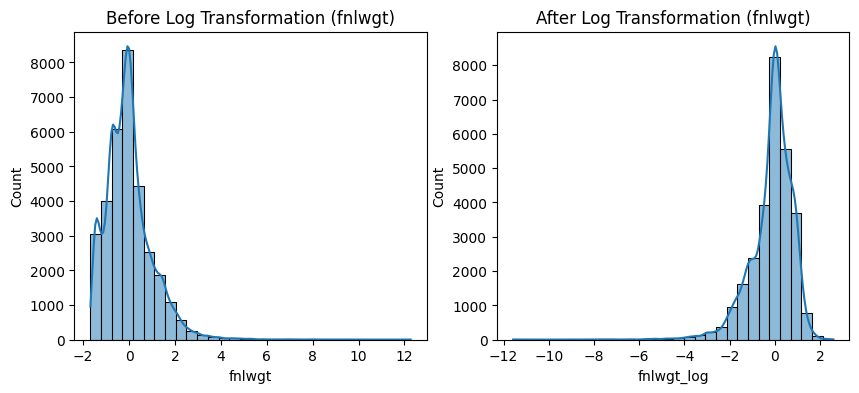

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_standard_scaler['fnlwgt'], bins=30, kde=True)
plt.title('Before Log Transformation (fnlwgt)')

plt.subplot(1,2,2)
sns.histplot(df_standard_scaler['fnlwgt_log'], bins=30, kde=True)
plt.title('After Log Transformation (fnlwgt)')

plt.show()

The feature fnlwgt (final sampling weight) exhibited a strong right skew with a few large values dominating the range.
To reduce skewness and stabilize variance, a logarithmic transformation (np.log1p) was applied.
After transformation, the distribution became more symmetrical, improving model interpretability and performance for algorithms sensitive to feature scaling.

In [88]:
df_standard_scaler

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,capital_net,education_work_ratio,fnlwgt_log
0,0.030671,7,-1.063611,9,1.134739,4,1,1,0.148453,-0.21666,...,0,1,0,0,0,0,1,0.159762,0.066297,NaN
1,0.837109,6,-1.008707,9,1.134739,2,4,0,-0.145920,-0.21666,...,0,1,0,0,0,0,1,-0.133670,1.894782,NaN
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,-0.145920,-0.21666,...,0,1,0,0,0,0,1,-0.133670,-0.204590,0.219199
3,1.057047,4,0.425801,1,-1.197459,2,6,0,-0.145920,-0.21666,...,0,1,0,0,1,0,0,-0.133670,-0.340033,0.354734
4,-0.775768,4,1.408176,9,1.134739,2,10,5,-0.145920,-0.21666,...,1,0,0,0,1,0,0,-0.133670,0.066297,0.878869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.639741,7,0.746039,2,13,5,-0.145920,-0.21666,...,1,0,0,0,0,0,1,-0.133670,0.041347,0.494538
32557,0.103983,4,-0.335433,11,-0.420060,2,7,0,-0.145920,-0.21666,...,0,1,0,0,0,0,1,-0.133670,-0.204590,-0.408619
32558,1.423610,4,-0.358777,11,-0.420060,6,1,4,-0.145920,-0.21666,...,1,0,0,0,0,0,1,-0.133670,-0.204590,-0.444379
32559,-1.215643,4,0.110960,11,-0.420060,4,1,3,-0.145920,-0.21666,...,0,1,0,0,0,0,1,-0.133670,0.404905,0.105224


### 4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [89]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.01,random_state=42)
y_pred = pd.Series(clf.fit_predict(df_standard_scaler))

In [90]:
clf.decision_function(df_standard_scaler)

array([0.14149106, 0.14525178, 0.21543673, ..., 0.16014613, 0.18036068,
       0.02254235])

In [91]:
len(y_pred[y_pred==-1])

326

In [92]:
outliers = df_standard_scaler[y_pred == -1]
outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,capital_net,education_work_ratio,fnlwgt_log
52,0.617171,4,-1.306921,14,1.912138,2,10,5,-0.145920,4.503482,...,1,0,0,0,0,0,1,-0.390389,-0.136868,NaN
93,-0.629143,4,-0.682449,11,-0.420060,2,12,5,-0.145920,3.687012,...,1,0,0,1,0,0,0,-0.345983,-0.117519,-1.147117
157,2.376673,6,2.884409,15,-0.031360,5,12,4,-0.145920,4.290058,...,0,1,0,0,1,0,0,-0.378782,12.730248,1.356971
226,1.570235,0,-1.568602,0,-1.586158,0,0,1,-0.145920,-0.216660,...,1,0,1,0,0,0,0,-0.133670,0.811235,NaN
297,0.030671,0,-0.306356,12,1.523438,2,0,5,0.323127,-0.216660,...,1,0,0,1,0,0,0,0.333877,0.134019,-0.365796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32341,2.596611,6,0.088657,9,1.134739,6,3,1,1.997697,-0.216660,...,0,1,0,0,0,0,1,2.003092,3.587824,0.084945
32370,1.057047,6,-0.494857,14,1.912138,4,10,1,3.622167,-0.216660,...,0,1,0,1,0,0,0,3.622367,0.201740,-0.682914
32445,1.643547,4,0.008561,11,-0.420060,6,3,1,-0.145920,3.925252,...,1,0,0,0,1,0,0,-0.358941,-0.326489,0.008525
32525,3.109799,0,-0.656575,8,0.357340,0,0,4,-0.145920,-0.216660,...,1,0,0,0,0,0,1,-0.133670,28.983448,-1.068785


- The Isolation Forest algorithm was used to detect and remove outliers with a contamination rate of 1%.
Rows with prediction -1 were identified as outliers, and those with +1 as normal observations.
Outliers were removed using Boolean indexing before further model training.

Outliers can negatively affect model performance by:

Skewing mean and variance during normalization or scaling.

Making the model fit extreme values instead of general patterns.

Increasing error and reducing generalization ability on unseen data.

In [93]:
col_names = df_standard_scaler.columns.to_list()
col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income',
 'sex_Female',
 'sex_Male',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'capital_net',
 'education_work_ratio',
 'fnlwgt_log']

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [ ]:
import ppscore as pps

df_pps = df_standard_scaler.copy()
df_pps['income'] = df['income']

In [ ]:
scores1 = pps.matrix(df_pps)

In [106]:
data = scores1.sort_values('ppscore',ascending=False)[['x','y','ppscore']]
data

,x,y,ppscore
0,age,age,1.0
24,workclass,workclass,1.0
72,education,education,1.0
95,education_num,education,1.0
96,education_num,education_num,1.0
...,...,...,...
201,capital_gain,race_Black,0.0
200,capital_gain,race_Asian-Pac-Islander,0.0
199,capital_gain,race_Amer-Indian-Eskimo,0.0
198,capital_gain,sex_Male,0.0


In [107]:
data[(data['x']!=data['y']) & (data['y']=='income')]

,x,y,ppscore
472,capital_net,income,0.400876
196,capital_gain,income,0.297123
81,education,income,0.243135
104,education_num,income,0.243135
495,education_work_ratio,income,0.168095
219,capital_loss,income,0.141755
35,workclass,income,0.094056
150,occupation,income,0.092410
242,hours_per_week,income,0.046097
265,native_country,income,0.009409


Applied PPS to quantify how well each feature predicts the target (income) individually.
Found that financial (capital_net, capital_gain) and education features (education, education_num) have moderate predictive power, while demographics and fnlwgt have almost none.
Unlike correlation, which measures only linear relationships, PPS captures nonlinear and categorical relationships, highlighting features that truly contribute to predicting income.